##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 1s

20709376/26421880 [======================>.......] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4202496/4422102 [===========================>..] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 0.1711

  44/1875 [..............................] - ETA: 2s - loss: 0.1076

  90/1875 [>.............................] - ETA: 2s - loss: 0.0830

 135/1875 [=>............................] - ETA: 1s - loss: 0.0712

 183/1875 [=>............................] - ETA: 1s - loss: 0.0632

 229/1875 [==>...........................] - ETA: 1s - loss: 0.0577

 276/1875 [===>..........................] - ETA: 1s - loss: 0.0536

 321/1875 [====>.........................] - ETA: 1s - loss: 0.0504

 365/1875 [====>.........................] - ETA: 1s - loss: 0.0477

 410/1875 [=====>........................] - ETA: 1s - loss: 0.0455

 457/1875 [======>.......................] - ETA: 1s - loss: 0.0435

 505/1875 [=======>......................] - ETA: 1s - loss: 0.0417

 553/1875 [=======>......................] - ETA: 1s - loss: 0.0402

 600/1875 [========>.....................] - ETA: 1s - loss: 0.0389

 648/1875 [=========>....................] - ETA: 1s - loss: 0.0376

 695/1875 [==========>...................] - ETA: 1s - loss: 0.0366

 742/1875 [==========>...................] - ETA: 1s - loss: 0.0356

 788/1875 [===========>..................] - ETA: 1s - loss: 0.0347

 834/1875 [============>.................] - ETA: 1s - loss: 0.0338

 879/1875 [=============>................] - ETA: 1s - loss: 0.0330

 927/1875 [=============>................] - ETA: 1s - loss: 0.0323

 975/1875 [==============>...............] - ETA: 0s - loss: 0.0316

1021/1875 [===============>..............] - ETA: 0s - loss: 0.0310

1066/1875 [================>.............] - ETA: 0s - loss: 0.0304

1112/1875 [================>.............] - ETA: 0s - loss: 0.0298

1157/1875 [=================>............] - ETA: 0s - loss: 0.0293

1204/1875 [==================>...........] - ETA: 0s - loss: 0.0287

1250/1875 [===================>..........] - ETA: 0s - loss: 0.0283

1296/1875 [===================>..........] - ETA: 0s - loss: 0.0278

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0274

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0271

1424/1875 [=====================>........] - ETA: 0s - loss: 0.0267

1469/1875 [======================>.......] - ETA: 0s - loss: 0.0263

1515/1875 [=======================>......] - ETA: 0s - loss: 0.0259

1561/1875 [=======================>......] - ETA: 0s - loss: 0.0256

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0252

1655/1875 [=========================>....] - ETA: 0s - loss: 0.0249

1701/1875 [==========================>...] - ETA: 0s - loss: 0.0246

1746/1875 [==========================>...] - ETA: 0s - loss: 0.0243

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0240

1836/1875 [============================>.] - ETA: 0s - loss: 0.0238

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0236 - val_loss: 0.0133


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0134

  47/1875 [..............................] - ETA: 1s - loss: 0.0131

  95/1875 [>.............................] - ETA: 1s - loss: 0.0130

 142/1875 [=>............................] - ETA: 1s - loss: 0.0129

 187/1875 [=>............................] - ETA: 1s - loss: 0.0129

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0128

 278/1875 [===>..........................] - ETA: 1s - loss: 0.0128

 323/1875 [====>.........................] - ETA: 1s - loss: 0.0127

 369/1875 [====>.........................] - ETA: 1s - loss: 0.0127

 416/1875 [=====>........................] - ETA: 1s - loss: 0.0127

 462/1875 [======>.......................] - ETA: 1s - loss: 0.0127

 507/1875 [=======>......................] - ETA: 1s - loss: 0.0126

 552/1875 [=======>......................] - ETA: 1s - loss: 0.0125

 597/1875 [========>.....................] - ETA: 1s - loss: 0.0125

 642/1875 [=========>....................] - ETA: 1s - loss: 0.0125

 687/1875 [=========>....................] - ETA: 1s - loss: 0.0124

 731/1875 [==========>...................] - ETA: 1s - loss: 0.0123

 777/1875 [===========>..................] - ETA: 1s - loss: 0.0123

 823/1875 [============>.................] - ETA: 1s - loss: 0.0123

 870/1875 [============>.................] - ETA: 1s - loss: 0.0122

 916/1875 [=============>................] - ETA: 1s - loss: 0.0122

 961/1875 [==============>...............] - ETA: 1s - loss: 0.0122

1007/1875 [===============>..............] - ETA: 0s - loss: 0.0121

1055/1875 [===============>..............] - ETA: 0s - loss: 0.0121

1102/1875 [================>.............] - ETA: 0s - loss: 0.0121

1149/1875 [=================>............] - ETA: 0s - loss: 0.0120

1196/1875 [==================>...........] - ETA: 0s - loss: 0.0120

1241/1875 [==================>...........] - ETA: 0s - loss: 0.0120

1286/1875 [===================>..........] - ETA: 0s - loss: 0.0119

1333/1875 [====================>.........] - ETA: 0s - loss: 0.0119

1379/1875 [=====================>........] - ETA: 0s - loss: 0.0119

1424/1875 [=====================>........] - ETA: 0s - loss: 0.0118

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0118

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0118

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0117

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0117

1661/1875 [=========================>....] - ETA: 0s - loss: 0.0117

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0117

1755/1875 [===========================>..] - ETA: 0s - loss: 0.0116

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0116

1851/1875 [============================>.] - ETA: 0s - loss: 0.0116

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0116 - val_loss: 0.0106


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0090

  45/1875 [..............................] - ETA: 2s - loss: 0.0107

  92/1875 [>.............................] - ETA: 1s - loss: 0.0106

 140/1875 [=>............................] - ETA: 1s - loss: 0.0106

 186/1875 [=>............................] - ETA: 1s - loss: 0.0105

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0105

 277/1875 [===>..........................] - ETA: 1s - loss: 0.0104

 323/1875 [====>.........................] - ETA: 1s - loss: 0.0104

 368/1875 [====>.........................] - ETA: 1s - loss: 0.0104

 415/1875 [=====>........................] - ETA: 1s - loss: 0.0104

 461/1875 [======>.......................] - ETA: 1s - loss: 0.0104

 506/1875 [=======>......................] - ETA: 1s - loss: 0.0104

 551/1875 [=======>......................] - ETA: 1s - loss: 0.0104

 599/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 647/1875 [=========>....................] - ETA: 1s - loss: 0.0103

 695/1875 [==========>...................] - ETA: 1s - loss: 0.0103

 740/1875 [==========>...................] - ETA: 1s - loss: 0.0103

 786/1875 [===========>..................] - ETA: 1s - loss: 0.0103

 833/1875 [============>.................] - ETA: 1s - loss: 0.0103

 881/1875 [=============>................] - ETA: 1s - loss: 0.0103

 927/1875 [=============>................] - ETA: 1s - loss: 0.0102

 972/1875 [==============>...............] - ETA: 0s - loss: 0.0102

1017/1875 [===============>..............] - ETA: 0s - loss: 0.0102

1062/1875 [===============>..............] - ETA: 0s - loss: 0.0102

1108/1875 [================>.............] - ETA: 0s - loss: 0.0102

1155/1875 [=================>............] - ETA: 0s - loss: 0.0102

1203/1875 [==================>...........] - ETA: 0s - loss: 0.0102

1248/1875 [==================>...........] - ETA: 0s - loss: 0.0102

1295/1875 [===================>..........] - ETA: 0s - loss: 0.0101

1341/1875 [====================>.........] - ETA: 0s - loss: 0.0101

1387/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1527/1875 [=======================>......] - ETA: 0s - loss: 0.0101

1574/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1664/1875 [=========================>....] - ETA: 0s - loss: 0.0100

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1846/1875 [============================>.] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0097


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0084

  46/1875 [..............................] - ETA: 2s - loss: 0.0095

  91/1875 [>.............................] - ETA: 1s - loss: 0.0095

 137/1875 [=>............................] - ETA: 1s - loss: 0.0096

 183/1875 [=>............................] - ETA: 1s - loss: 0.0096

 231/1875 [==>...........................] - ETA: 1s - loss: 0.0095

 278/1875 [===>..........................] - ETA: 1s - loss: 0.0095

 323/1875 [====>.........................] - ETA: 1s - loss: 0.0095

 369/1875 [====>.........................] - ETA: 1s - loss: 0.0095

 415/1875 [=====>........................] - ETA: 1s - loss: 0.0095

 462/1875 [======>.......................] - ETA: 1s - loss: 0.0095

 507/1875 [=======>......................] - ETA: 1s - loss: 0.0095

 553/1875 [=======>......................] - ETA: 1s - loss: 0.0095

 599/1875 [========>.....................] - ETA: 1s - loss: 0.0095

 646/1875 [=========>....................] - ETA: 1s - loss: 0.0095

 692/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 738/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 831/1875 [============>.................] - ETA: 1s - loss: 0.0095

 878/1875 [=============>................] - ETA: 1s - loss: 0.0095

 926/1875 [=============>................] - ETA: 1s - loss: 0.0095

 972/1875 [==============>...............] - ETA: 0s - loss: 0.0095

1018/1875 [===============>..............] - ETA: 0s - loss: 0.0095

1063/1875 [================>.............] - ETA: 0s - loss: 0.0095

1109/1875 [================>.............] - ETA: 0s - loss: 0.0095

1154/1875 [=================>............] - ETA: 0s - loss: 0.0095

1201/1875 [==================>...........] - ETA: 0s - loss: 0.0095

1249/1875 [==================>...........] - ETA: 0s - loss: 0.0095

1296/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1342/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1389/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1529/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1574/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1664/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1709/1875 [==========================>...] - ETA: 0s - loss: 0.0094

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0094

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0094

1849/1875 [============================>.] - ETA: 0s - loss: 0.0094

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0094


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0091

  48/1875 [..............................] - ETA: 1s - loss: 0.0093

  96/1875 [>.............................] - ETA: 1s - loss: 0.0094

 143/1875 [=>............................] - ETA: 1s - loss: 0.0093

 191/1875 [==>...........................] - ETA: 1s - loss: 0.0092

 239/1875 [==>...........................] - ETA: 1s - loss: 0.0092

 287/1875 [===>..........................] - ETA: 1s - loss: 0.0092

 335/1875 [====>.........................] - ETA: 1s - loss: 0.0093

 383/1875 [=====>........................] - ETA: 1s - loss: 0.0093

 431/1875 [=====>........................] - ETA: 1s - loss: 0.0093

 477/1875 [======>.......................] - ETA: 1s - loss: 0.0092

 525/1875 [=======>......................] - ETA: 1s - loss: 0.0092

 571/1875 [========>.....................] - ETA: 1s - loss: 0.0092

 616/1875 [========>.....................] - ETA: 1s - loss: 0.0092

 662/1875 [=========>....................] - ETA: 1s - loss: 0.0092

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 754/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 802/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 849/1875 [============>.................] - ETA: 1s - loss: 0.0092

 897/1875 [=============>................] - ETA: 1s - loss: 0.0092

 944/1875 [==============>...............] - ETA: 0s - loss: 0.0092

 991/1875 [==============>...............] - ETA: 0s - loss: 0.0092

1036/1875 [===============>..............] - ETA: 0s - loss: 0.0092

1084/1875 [================>.............] - ETA: 0s - loss: 0.0092

1132/1875 [=================>............] - ETA: 0s - loss: 0.0092

1180/1875 [=================>............] - ETA: 0s - loss: 0.0092

1228/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1273/1875 [===================>..........] - ETA: 0s - loss: 0.0092

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1366/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1412/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1457/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1499/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1541/1875 [=======================>......] - ETA: 0s - loss: 0.0091

1581/1875 [========================>.....] - ETA: 0s - loss: 0.0091

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0091

1668/1875 [=========================>....] - ETA: 0s - loss: 0.0091

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0091

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0091

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0091

1840/1875 [============================>.] - ETA: 0s - loss: 0.0091

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - val_loss: 0.0091


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0068

  48/1875 [..............................] - ETA: 1s - loss: 0.0091

  95/1875 [>.............................] - ETA: 1s - loss: 0.0091

 142/1875 [=>............................] - ETA: 1s - loss: 0.0092

 188/1875 [==>...........................] - ETA: 1s - loss: 0.0091

 233/1875 [==>...........................] - ETA: 1s - loss: 0.0091

 278/1875 [===>..........................] - ETA: 1s - loss: 0.0091

 325/1875 [====>.........................] - ETA: 1s - loss: 0.0091

 373/1875 [====>.........................] - ETA: 1s - loss: 0.0091

 421/1875 [=====>........................] - ETA: 1s - loss: 0.0091

 467/1875 [======>.......................] - ETA: 1s - loss: 0.0091

 514/1875 [=======>......................] - ETA: 1s - loss: 0.0090

 560/1875 [=======>......................] - ETA: 1s - loss: 0.0090

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0091

 650/1875 [=========>....................] - ETA: 1s - loss: 0.0091

 697/1875 [==========>...................] - ETA: 1s - loss: 0.0091

 743/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 789/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 834/1875 [============>.................] - ETA: 1s - loss: 0.0091

 879/1875 [=============>................] - ETA: 1s - loss: 0.0090

 924/1875 [=============>................] - ETA: 1s - loss: 0.0090

 970/1875 [==============>...............] - ETA: 0s - loss: 0.0090

1016/1875 [===============>..............] - ETA: 0s - loss: 0.0090

1063/1875 [================>.............] - ETA: 0s - loss: 0.0090

1108/1875 [================>.............] - ETA: 0s - loss: 0.0090

1155/1875 [=================>............] - ETA: 0s - loss: 0.0090

1202/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1248/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1295/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1342/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1388/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1433/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1570/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1839/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0091


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0080

  50/1875 [..............................] - ETA: 1s - loss: 0.0090

  97/1875 [>.............................] - ETA: 1s - loss: 0.0089

 144/1875 [=>............................] - ETA: 1s - loss: 0.0089

 190/1875 [==>...........................] - ETA: 1s - loss: 0.0089

 238/1875 [==>...........................] - ETA: 1s - loss: 0.0089

 283/1875 [===>..........................] - ETA: 1s - loss: 0.0089

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0089

 371/1875 [====>.........................] - ETA: 1s - loss: 0.0089

 418/1875 [=====>........................] - ETA: 1s - loss: 0.0089

 466/1875 [======>.......................] - ETA: 1s - loss: 0.0089

 514/1875 [=======>......................] - ETA: 1s - loss: 0.0089

 561/1875 [=======>......................] - ETA: 1s - loss: 0.0089

 608/1875 [========>.....................] - ETA: 1s - loss: 0.0089

 656/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 704/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 841/1875 [============>.................] - ETA: 1s - loss: 0.0089

 888/1875 [=============>................] - ETA: 1s - loss: 0.0089

 936/1875 [=============>................] - ETA: 1s - loss: 0.0089

 984/1875 [==============>...............] - ETA: 0s - loss: 0.0089

1031/1875 [===============>..............] - ETA: 0s - loss: 0.0089

1079/1875 [================>.............] - ETA: 0s - loss: 0.0089

1126/1875 [=================>............] - ETA: 0s - loss: 0.0089

1174/1875 [=================>............] - ETA: 0s - loss: 0.0089

1220/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1267/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1314/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1359/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1404/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1449/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1495/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1588/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1635/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1777/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1824/1875 [============================>.] - ETA: 0s - loss: 0.0089

1871/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0089


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0108

  48/1875 [..............................] - ETA: 1s - loss: 0.0089

  93/1875 [>.............................] - ETA: 1s - loss: 0.0088

 139/1875 [=>............................] - ETA: 1s - loss: 0.0089

 185/1875 [=>............................] - ETA: 1s - loss: 0.0088

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0088

 277/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 323/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 368/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 413/1875 [=====>........................] - ETA: 1s - loss: 0.0087

 460/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 505/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 550/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 595/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 640/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 687/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 735/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 783/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 830/1875 [============>.................] - ETA: 1s - loss: 0.0088

 878/1875 [=============>................] - ETA: 1s - loss: 0.0088

 925/1875 [=============>................] - ETA: 1s - loss: 0.0088

 972/1875 [==============>...............] - ETA: 0s - loss: 0.0088

1019/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1067/1875 [================>.............] - ETA: 0s - loss: 0.0088

1113/1875 [================>.............] - ETA: 0s - loss: 0.0088

1158/1875 [=================>............] - ETA: 0s - loss: 0.0088

1204/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1250/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1295/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1339/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1430/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1476/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1569/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1660/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1706/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1844/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0087

  47/1875 [..............................] - ETA: 1s - loss: 0.0088

  94/1875 [>.............................] - ETA: 1s - loss: 0.0087

 141/1875 [=>............................] - ETA: 1s - loss: 0.0087

 187/1875 [=>............................] - ETA: 1s - loss: 0.0088

 233/1875 [==>...........................] - ETA: 1s - loss: 0.0088

 280/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 372/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 418/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 465/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 512/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 556/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 602/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 648/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 693/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 739/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 785/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 832/1875 [============>.................] - ETA: 1s - loss: 0.0087

 880/1875 [=============>................] - ETA: 1s - loss: 0.0087

 927/1875 [=============>................] - ETA: 1s - loss: 0.0087

 973/1875 [==============>...............] - ETA: 0s - loss: 0.0087

1018/1875 [===============>..............] - ETA: 0s - loss: 0.0087

1065/1875 [================>.............] - ETA: 0s - loss: 0.0087

1112/1875 [================>.............] - ETA: 0s - loss: 0.0087

1160/1875 [=================>............] - ETA: 0s - loss: 0.0087

1206/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1253/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1299/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1344/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1389/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1436/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1483/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1663/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1757/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1850/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0088


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0121

  47/1875 [..............................] - ETA: 1s - loss: 0.0086

  93/1875 [>.............................] - ETA: 1s - loss: 0.0085

 140/1875 [=>............................] - ETA: 1s - loss: 0.0085

 188/1875 [==>...........................] - ETA: 1s - loss: 0.0086

 235/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 280/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 326/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 372/1875 [====>.........................] - ETA: 1s - loss: 0.0087

 418/1875 [=====>........................] - ETA: 1s - loss: 0.0087

 465/1875 [======>.......................] - ETA: 1s - loss: 0.0087

 512/1875 [=======>......................] - ETA: 1s - loss: 0.0087

 558/1875 [=======>......................] - ETA: 1s - loss: 0.0086

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0086

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0086

 696/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 742/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 789/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 837/1875 [============>.................] - ETA: 1s - loss: 0.0087

 884/1875 [=============>................] - ETA: 1s - loss: 0.0087

 932/1875 [=============>................] - ETA: 1s - loss: 0.0087

 977/1875 [==============>...............] - ETA: 0s - loss: 0.0087

1022/1875 [===============>..............] - ETA: 0s - loss: 0.0087

1068/1875 [================>.............] - ETA: 0s - loss: 0.0087

1115/1875 [================>.............] - ETA: 0s - loss: 0.0087

1160/1875 [=================>............] - ETA: 0s - loss: 0.0087

1205/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1250/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1295/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1340/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1569/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1706/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1846/1875 [============================>.] - ETA: 0s - loss: 0.0087

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

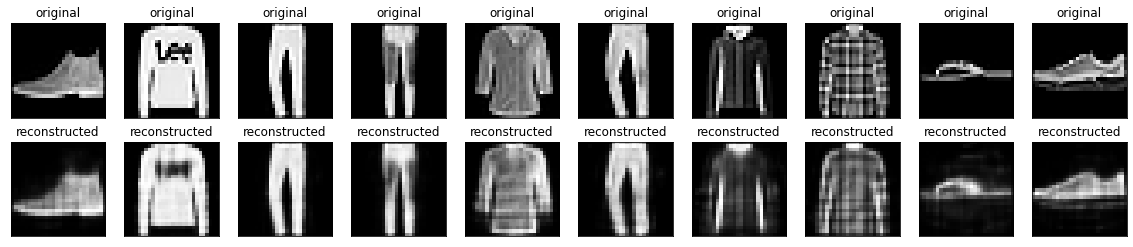

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


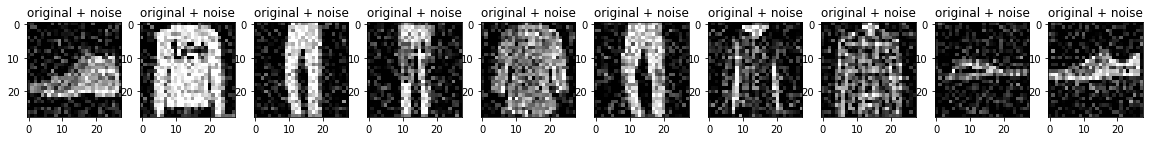

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 0.1667

  29/1875 [..............................] - ETA: 3s - loss: 0.1636

  59/1875 [..............................] - ETA: 3s - loss: 0.1313

  88/1875 [>.............................] - ETA: 3s - loss: 0.1002

 116/1875 [>.............................] - ETA: 3s - loss: 0.0827

 144/1875 [=>............................] - ETA: 3s - loss: 0.0714

 172/1875 [=>............................] - ETA: 3s - loss: 0.0635

 202/1875 [==>...........................] - ETA: 2s - loss: 0.0571

 231/1875 [==>...........................] - ETA: 2s - loss: 0.0525

 260/1875 [===>..........................] - ETA: 2s - loss: 0.0487

 289/1875 [===>..........................] - ETA: 2s - loss: 0.0456

 317/1875 [====>.........................] - ETA: 2s - loss: 0.0431

 345/1875 [====>.........................] - ETA: 2s - loss: 0.0409

 374/1875 [====>.........................] - ETA: 2s - loss: 0.0390

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0373

 434/1875 [=====>........................] - ETA: 2s - loss: 0.0358

 464/1875 [======>.......................] - ETA: 2s - loss: 0.0344

 494/1875 [======>.......................] - ETA: 2s - loss: 0.0332

 523/1875 [=======>......................] - ETA: 2s - loss: 0.0322

 552/1875 [=======>......................] - ETA: 2s - loss: 0.0313

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0304

 609/1875 [========>.....................] - ETA: 2s - loss: 0.0297

 638/1875 [=========>....................] - ETA: 2s - loss: 0.0290

 665/1875 [=========>....................] - ETA: 2s - loss: 0.0283

 693/1875 [==========>...................] - ETA: 2s - loss: 0.0277

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0272

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0266

 778/1875 [===========>..................] - ETA: 1s - loss: 0.0262

 806/1875 [===========>..................] - ETA: 1s - loss: 0.0257

 834/1875 [============>.................] - ETA: 1s - loss: 0.0253

 863/1875 [============>.................] - ETA: 1s - loss: 0.0249

 893/1875 [=============>................] - ETA: 1s - loss: 0.0245

 922/1875 [=============>................] - ETA: 1s - loss: 0.0241

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0237

 981/1875 [==============>...............] - ETA: 1s - loss: 0.0234

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0231

1040/1875 [===============>..............] - ETA: 1s - loss: 0.0228

1068/1875 [================>.............] - ETA: 1s - loss: 0.0225

1096/1875 [================>.............] - ETA: 1s - loss: 0.0222

1124/1875 [================>.............] - ETA: 1s - loss: 0.0220

1152/1875 [=================>............] - ETA: 1s - loss: 0.0217

1180/1875 [=================>............] - ETA: 1s - loss: 0.0215

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0212

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0210

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0208

1293/1875 [===================>..........] - ETA: 1s - loss: 0.0206

1322/1875 [====================>.........] - ETA: 0s - loss: 0.0204

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0202

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0200

1408/1875 [=====================>........] - ETA: 0s - loss: 0.0199

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0197

1466/1875 [======================>.......] - ETA: 0s - loss: 0.0195

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0194

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0192

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0191

1582/1875 [========================>.....] - ETA: 0s - loss: 0.0189

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0188

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0186

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0185

1696/1875 [==========================>...] - ETA: 0s - loss: 0.0184

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0183

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0181

1782/1875 [===========================>..] - ETA: 0s - loss: 0.0180

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0179

1838/1875 [============================>.] - ETA: 0s - loss: 0.0178

1866/1875 [============================>.] - ETA: 0s - loss: 0.0177

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - val_loss: 0.0108


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0095

  29/1875 [..............................] - ETA: 3s - loss: 0.0106

  57/1875 [..............................] - ETA: 3s - loss: 0.0107

  85/1875 [>.............................] - ETA: 3s - loss: 0.0107

 113/1875 [>.............................] - ETA: 3s - loss: 0.0107

 142/1875 [=>............................] - ETA: 3s - loss: 0.0106

 171/1875 [=>............................] - ETA: 3s - loss: 0.0107

 200/1875 [==>...........................] - ETA: 2s - loss: 0.0106

 228/1875 [==>...........................] - ETA: 2s - loss: 0.0106

 257/1875 [===>..........................] - ETA: 2s - loss: 0.0106

 285/1875 [===>..........................] - ETA: 2s - loss: 0.0106

 314/1875 [====>.........................] - ETA: 2s - loss: 0.0106

 343/1875 [====>.........................] - ETA: 2s - loss: 0.0106

 372/1875 [====>.........................] - ETA: 2s - loss: 0.0106

 401/1875 [=====>........................] - ETA: 2s - loss: 0.0105

 430/1875 [=====>........................] - ETA: 2s - loss: 0.0105

 460/1875 [======>.......................] - ETA: 2s - loss: 0.0105

 489/1875 [======>.......................] - ETA: 2s - loss: 0.0105

 518/1875 [=======>......................] - ETA: 2s - loss: 0.0105

 546/1875 [=======>......................] - ETA: 2s - loss: 0.0105

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0105

 604/1875 [========>.....................] - ETA: 2s - loss: 0.0105

 633/1875 [=========>....................] - ETA: 2s - loss: 0.0104

 662/1875 [=========>....................] - ETA: 2s - loss: 0.0104

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0104

 718/1875 [==========>...................] - ETA: 2s - loss: 0.0104

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0104

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0104

 801/1875 [===========>..................] - ETA: 1s - loss: 0.0104

 829/1875 [============>.................] - ETA: 1s - loss: 0.0104

 858/1875 [============>.................] - ETA: 1s - loss: 0.0103

 887/1875 [=============>................] - ETA: 1s - loss: 0.0103

 917/1875 [=============>................] - ETA: 1s - loss: 0.0103

 947/1875 [==============>...............] - ETA: 1s - loss: 0.0103

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0103

1006/1875 [===============>..............] - ETA: 1s - loss: 0.0103

1036/1875 [===============>..............] - ETA: 1s - loss: 0.0103

1066/1875 [================>.............] - ETA: 1s - loss: 0.0102

1096/1875 [================>.............] - ETA: 1s - loss: 0.0102

1124/1875 [================>.............] - ETA: 1s - loss: 0.0102

1153/1875 [=================>............] - ETA: 1s - loss: 0.0102

1181/1875 [=================>............] - ETA: 1s - loss: 0.0102

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0102

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0102

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0102

1293/1875 [===================>..........] - ETA: 1s - loss: 0.0102

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0102

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0102

1380/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1410/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1498/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0101

1558/1875 [=======================>......] - ETA: 0s - loss: 0.0101

1588/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1617/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0101

1676/1875 [=========================>....] - ETA: 0s - loss: 0.0101

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1817/1875 [============================>.] - ETA: 0s - loss: 0.0100

1846/1875 [============================>.] - ETA: 0s - loss: 0.0100

1874/1875 [============================>.] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - val_loss: 0.0095


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0099

  29/1875 [..............................] - ETA: 3s - loss: 0.0096

  56/1875 [..............................] - ETA: 3s - loss: 0.0095

  84/1875 [>.............................] - ETA: 3s - loss: 0.0095

 112/1875 [>.............................] - ETA: 3s - loss: 0.0095

 140/1875 [=>............................] - ETA: 3s - loss: 0.0095

 168/1875 [=>............................] - ETA: 3s - loss: 0.0095

 196/1875 [==>...........................] - ETA: 3s - loss: 0.0094

 224/1875 [==>...........................] - ETA: 2s - loss: 0.0094

 252/1875 [===>..........................] - ETA: 2s - loss: 0.0094

 281/1875 [===>..........................] - ETA: 2s - loss: 0.0094

 309/1875 [===>..........................] - ETA: 2s - loss: 0.0094

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0094

 366/1875 [====>.........................] - ETA: 2s - loss: 0.0094

 396/1875 [=====>........................] - ETA: 2s - loss: 0.0093

 425/1875 [=====>........................] - ETA: 2s - loss: 0.0093

 454/1875 [======>.......................] - ETA: 2s - loss: 0.0093

 483/1875 [======>.......................] - ETA: 2s - loss: 0.0093

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0093

 539/1875 [=======>......................] - ETA: 2s - loss: 0.0093

 567/1875 [========>.....................] - ETA: 2s - loss: 0.0093

 594/1875 [========>.....................] - ETA: 2s - loss: 0.0093

 621/1875 [========>.....................] - ETA: 2s - loss: 0.0093

 650/1875 [=========>....................] - ETA: 2s - loss: 0.0093

 679/1875 [=========>....................] - ETA: 2s - loss: 0.0093

 709/1875 [==========>...................] - ETA: 2s - loss: 0.0093

 738/1875 [==========>...................] - ETA: 2s - loss: 0.0093

 765/1875 [===========>..................] - ETA: 1s - loss: 0.0093

 793/1875 [===========>..................] - ETA: 1s - loss: 0.0093

 822/1875 [============>.................] - ETA: 1s - loss: 0.0093

 849/1875 [============>.................] - ETA: 1s - loss: 0.0093

 877/1875 [=============>................] - ETA: 1s - loss: 0.0092

 905/1875 [=============>................] - ETA: 1s - loss: 0.0092

 933/1875 [=============>................] - ETA: 1s - loss: 0.0092

 962/1875 [==============>...............] - ETA: 1s - loss: 0.0092

 990/1875 [==============>...............] - ETA: 1s - loss: 0.0092

1019/1875 [===============>..............] - ETA: 1s - loss: 0.0092

1049/1875 [===============>..............] - ETA: 1s - loss: 0.0092

1078/1875 [================>.............] - ETA: 1s - loss: 0.0092

1106/1875 [================>.............] - ETA: 1s - loss: 0.0092

1134/1875 [=================>............] - ETA: 1s - loss: 0.0092

1161/1875 [=================>............] - ETA: 1s - loss: 0.0092

1189/1875 [==================>...........] - ETA: 1s - loss: 0.0092

1218/1875 [==================>...........] - ETA: 1s - loss: 0.0092

1246/1875 [==================>...........] - ETA: 1s - loss: 0.0092

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0092

1306/1875 [===================>..........] - ETA: 1s - loss: 0.0092

1335/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1363/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1393/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1423/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1453/1875 [======================>.......] - ETA: 0s - loss: 0.0091

1483/1875 [======================>.......] - ETA: 0s - loss: 0.0091

1512/1875 [=======================>......] - ETA: 0s - loss: 0.0091

1540/1875 [=======================>......] - ETA: 0s - loss: 0.0091

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0091

1597/1875 [========================>.....] - ETA: 0s - loss: 0.0091

1627/1875 [=========================>....] - ETA: 0s - loss: 0.0091

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0091

1687/1875 [=========================>....] - ETA: 0s - loss: 0.0091

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0091

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0091

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0091

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0091

1833/1875 [============================>.] - ETA: 0s - loss: 0.0091

1862/1875 [============================>.] - ETA: 0s - loss: 0.0091

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0087


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0079

  30/1875 [..............................] - ETA: 3s - loss: 0.0088

  59/1875 [..............................] - ETA: 3s - loss: 0.0088

  88/1875 [>.............................] - ETA: 3s - loss: 0.0088

 117/1875 [>.............................] - ETA: 3s - loss: 0.0087

 146/1875 [=>............................] - ETA: 2s - loss: 0.0087

 175/1875 [=>............................] - ETA: 2s - loss: 0.0087

 202/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 230/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 258/1875 [===>..........................] - ETA: 2s - loss: 0.0086

 286/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 315/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 345/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 375/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 432/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 461/1875 [======>.......................] - ETA: 2s - loss: 0.0087

 491/1875 [======>.......................] - ETA: 2s - loss: 0.0087

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0087

 549/1875 [=======>......................] - ETA: 2s - loss: 0.0087

 578/1875 [========>.....................] - ETA: 2s - loss: 0.0087

 607/1875 [========>.....................] - ETA: 2s - loss: 0.0087

 635/1875 [=========>....................] - ETA: 2s - loss: 0.0087

 664/1875 [=========>....................] - ETA: 2s - loss: 0.0086

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0086

 722/1875 [==========>...................] - ETA: 2s - loss: 0.0086

 751/1875 [===========>..................] - ETA: 1s - loss: 0.0086

 780/1875 [===========>..................] - ETA: 1s - loss: 0.0086

 809/1875 [===========>..................] - ETA: 1s - loss: 0.0086

 836/1875 [============>.................] - ETA: 1s - loss: 0.0086

 865/1875 [============>.................] - ETA: 1s - loss: 0.0086

 893/1875 [=============>................] - ETA: 1s - loss: 0.0086

 921/1875 [=============>................] - ETA: 1s - loss: 0.0086

 948/1875 [==============>...............] - ETA: 1s - loss: 0.0086

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0086

1007/1875 [===============>..............] - ETA: 1s - loss: 0.0086

1037/1875 [===============>..............] - ETA: 1s - loss: 0.0086

1065/1875 [================>.............] - ETA: 1s - loss: 0.0086

1094/1875 [================>.............] - ETA: 1s - loss: 0.0086

1121/1875 [================>.............] - ETA: 1s - loss: 0.0086

1150/1875 [=================>............] - ETA: 1s - loss: 0.0086

1179/1875 [=================>............] - ETA: 1s - loss: 0.0086

1207/1875 [==================>...........] - ETA: 1s - loss: 0.0086

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0086

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0086

1292/1875 [===================>..........] - ETA: 1s - loss: 0.0086

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0086

1351/1875 [====================>.........] - ETA: 0s - loss: 0.0086

1381/1875 [=====================>........] - ETA: 0s - loss: 0.0086

1409/1875 [=====================>........] - ETA: 0s - loss: 0.0086

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0086

1465/1875 [======================>.......] - ETA: 0s - loss: 0.0086

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0086

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0086

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0085

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0085

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0085

1641/1875 [=========================>....] - ETA: 0s - loss: 0.0085

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0085

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0085

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0085

1753/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1781/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0085

1837/1875 [============================>.] - ETA: 0s - loss: 0.0085

1864/1875 [============================>.] - ETA: 0s - loss: 0.0085

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - val_loss: 0.0084


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0080

  28/1875 [..............................] - ETA: 3s - loss: 0.0083

  56/1875 [..............................] - ETA: 3s - loss: 0.0083

  85/1875 [>.............................] - ETA: 3s - loss: 0.0084

 113/1875 [>.............................] - ETA: 3s - loss: 0.0084

 141/1875 [=>............................] - ETA: 3s - loss: 0.0084

 170/1875 [=>............................] - ETA: 3s - loss: 0.0083

 200/1875 [==>...........................] - ETA: 3s - loss: 0.0083

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0083

 257/1875 [===>..........................] - ETA: 2s - loss: 0.0083

 286/1875 [===>..........................] - ETA: 2s - loss: 0.0083

 315/1875 [====>.........................] - ETA: 2s - loss: 0.0083

 344/1875 [====>.........................] - ETA: 2s - loss: 0.0083

 372/1875 [====>.........................] - ETA: 2s - loss: 0.0083

 400/1875 [=====>........................] - ETA: 2s - loss: 0.0083

 428/1875 [=====>........................] - ETA: 2s - loss: 0.0083

 456/1875 [======>.......................] - ETA: 2s - loss: 0.0083

 484/1875 [======>.......................] - ETA: 2s - loss: 0.0083

 513/1875 [=======>......................] - ETA: 2s - loss: 0.0083

 542/1875 [=======>......................] - ETA: 2s - loss: 0.0083

 571/1875 [========>.....................] - ETA: 2s - loss: 0.0083

 599/1875 [========>.....................] - ETA: 2s - loss: 0.0083

 628/1875 [=========>....................] - ETA: 2s - loss: 0.0083

 655/1875 [=========>....................] - ETA: 2s - loss: 0.0083

 683/1875 [=========>....................] - ETA: 2s - loss: 0.0083

 711/1875 [==========>...................] - ETA: 2s - loss: 0.0083

 739/1875 [==========>...................] - ETA: 2s - loss: 0.0083

 769/1875 [===========>..................] - ETA: 1s - loss: 0.0083

 797/1875 [===========>..................] - ETA: 1s - loss: 0.0083

 824/1875 [============>.................] - ETA: 1s - loss: 0.0083

 854/1875 [============>.................] - ETA: 1s - loss: 0.0083

 883/1875 [=============>................] - ETA: 1s - loss: 0.0083

 913/1875 [=============>................] - ETA: 1s - loss: 0.0083

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0083

 971/1875 [==============>...............] - ETA: 1s - loss: 0.0083

1000/1875 [===============>..............] - ETA: 1s - loss: 0.0083

1029/1875 [===============>..............] - ETA: 1s - loss: 0.0083

1056/1875 [===============>..............] - ETA: 1s - loss: 0.0083

1085/1875 [================>.............] - ETA: 1s - loss: 0.0083

1113/1875 [================>.............] - ETA: 1s - loss: 0.0083

1141/1875 [=================>............] - ETA: 1s - loss: 0.0083

1170/1875 [=================>............] - ETA: 1s - loss: 0.0083

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0083

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0083

1256/1875 [===================>..........] - ETA: 1s - loss: 0.0083

1284/1875 [===================>..........] - ETA: 1s - loss: 0.0083

1313/1875 [====================>.........] - ETA: 1s - loss: 0.0083

1342/1875 [====================>.........] - ETA: 0s - loss: 0.0083

1370/1875 [====================>.........] - ETA: 0s - loss: 0.0083

1399/1875 [=====================>........] - ETA: 0s - loss: 0.0082

1429/1875 [=====================>........] - ETA: 0s - loss: 0.0082

1457/1875 [======================>.......] - ETA: 0s - loss: 0.0082

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0082

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0082

1540/1875 [=======================>......] - ETA: 0s - loss: 0.0082

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0082

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0082

1623/1875 [========================>.....] - ETA: 0s - loss: 0.0082

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0082

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0082

1707/1875 [==========================>...] - ETA: 0s - loss: 0.0082

1735/1875 [==========================>...] - ETA: 0s - loss: 0.0082

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0082

1818/1875 [============================>.] - ETA: 0s - loss: 0.0082

1846/1875 [============================>.] - ETA: 0s - loss: 0.0082

1875/1875 [==============================] - ETA: 0s - loss: 0.0082

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - val_loss: 0.0083


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0085

  29/1875 [..............................] - ETA: 3s - loss: 0.0080

  57/1875 [..............................] - ETA: 3s - loss: 0.0081

  85/1875 [>.............................] - ETA: 3s - loss: 0.0082

 113/1875 [>.............................] - ETA: 3s - loss: 0.0082

 142/1875 [=>............................] - ETA: 3s - loss: 0.0081

 170/1875 [=>............................] - ETA: 3s - loss: 0.0081

 199/1875 [==>...........................] - ETA: 2s - loss: 0.0081

 228/1875 [==>...........................] - ETA: 2s - loss: 0.0081

 258/1875 [===>..........................] - ETA: 2s - loss: 0.0081

 286/1875 [===>..........................] - ETA: 2s - loss: 0.0081

 315/1875 [====>.........................] - ETA: 2s - loss: 0.0081

 345/1875 [====>.........................] - ETA: 2s - loss: 0.0081

 375/1875 [=====>........................] - ETA: 2s - loss: 0.0081

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0081

 434/1875 [=====>........................] - ETA: 2s - loss: 0.0081

 462/1875 [======>.......................] - ETA: 2s - loss: 0.0081

 490/1875 [======>.......................] - ETA: 2s - loss: 0.0081

 518/1875 [=======>......................] - ETA: 2s - loss: 0.0081

 548/1875 [=======>......................] - ETA: 2s - loss: 0.0081

 577/1875 [========>.....................] - ETA: 2s - loss: 0.0081

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0081

 633/1875 [=========>....................] - ETA: 2s - loss: 0.0081

 662/1875 [=========>....................] - ETA: 2s - loss: 0.0081

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0081

 718/1875 [==========>...................] - ETA: 2s - loss: 0.0081

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0081

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0081

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0081

 832/1875 [============>.................] - ETA: 1s - loss: 0.0081

 861/1875 [============>.................] - ETA: 1s - loss: 0.0081

 890/1875 [=============>................] - ETA: 1s - loss: 0.0081

 919/1875 [=============>................] - ETA: 1s - loss: 0.0081

 947/1875 [==============>...............] - ETA: 1s - loss: 0.0081

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0081

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0081

1035/1875 [===============>..............] - ETA: 1s - loss: 0.0081

1062/1875 [===============>..............] - ETA: 1s - loss: 0.0081

1090/1875 [================>.............] - ETA: 1s - loss: 0.0081

1118/1875 [================>.............] - ETA: 1s - loss: 0.0081

1145/1875 [=================>............] - ETA: 1s - loss: 0.0081

1173/1875 [=================>............] - ETA: 1s - loss: 0.0081

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0081

1232/1875 [==================>...........] - ETA: 1s - loss: 0.0081

1260/1875 [===================>..........] - ETA: 1s - loss: 0.0081

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0081

1314/1875 [====================>.........] - ETA: 1s - loss: 0.0081

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0081

1373/1875 [====================>.........] - ETA: 0s - loss: 0.0081

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0081

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0081

1457/1875 [======================>.......] - ETA: 0s - loss: 0.0081

1486/1875 [======================>.......] - ETA: 0s - loss: 0.0081

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0081

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0080

1573/1875 [========================>.....] - ETA: 0s - loss: 0.0081

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0081

1631/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1688/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1717/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1746/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1834/1875 [============================>.] - ETA: 0s - loss: 0.0080

1863/1875 [============================>.] - ETA: 0s - loss: 0.0080

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0080 - val_loss: 0.0080


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0081

  30/1875 [..............................] - ETA: 3s - loss: 0.0078

  60/1875 [..............................] - ETA: 3s - loss: 0.0079

  90/1875 [>.............................] - ETA: 3s - loss: 0.0079

 119/1875 [>.............................] - ETA: 2s - loss: 0.0079

 148/1875 [=>............................] - ETA: 2s - loss: 0.0080

 177/1875 [=>............................] - ETA: 2s - loss: 0.0080

 206/1875 [==>...........................] - ETA: 2s - loss: 0.0079

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0080

 264/1875 [===>..........................] - ETA: 2s - loss: 0.0080

 293/1875 [===>..........................] - ETA: 2s - loss: 0.0080

 322/1875 [====>.........................] - ETA: 2s - loss: 0.0080

 352/1875 [====>.........................] - ETA: 2s - loss: 0.0080

 381/1875 [=====>........................] - ETA: 2s - loss: 0.0080

 409/1875 [=====>........................] - ETA: 2s - loss: 0.0080

 438/1875 [======>.......................] - ETA: 2s - loss: 0.0080

 466/1875 [======>.......................] - ETA: 2s - loss: 0.0080

 493/1875 [======>.......................] - ETA: 2s - loss: 0.0080

 520/1875 [=======>......................] - ETA: 2s - loss: 0.0080

 547/1875 [=======>......................] - ETA: 2s - loss: 0.0080

 574/1875 [========>.....................] - ETA: 2s - loss: 0.0080

 602/1875 [========>.....................] - ETA: 2s - loss: 0.0079

 631/1875 [=========>....................] - ETA: 2s - loss: 0.0079

 659/1875 [=========>....................] - ETA: 2s - loss: 0.0080

 688/1875 [==========>...................] - ETA: 2s - loss: 0.0079

 716/1875 [==========>...................] - ETA: 2s - loss: 0.0080

 745/1875 [==========>...................] - ETA: 2s - loss: 0.0080

 775/1875 [===========>..................] - ETA: 1s - loss: 0.0079

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0079

 831/1875 [============>.................] - ETA: 1s - loss: 0.0079

 859/1875 [============>.................] - ETA: 1s - loss: 0.0079

 887/1875 [=============>................] - ETA: 1s - loss: 0.0079

 915/1875 [=============>................] - ETA: 1s - loss: 0.0079

 945/1875 [==============>...............] - ETA: 1s - loss: 0.0079

 974/1875 [==============>...............] - ETA: 1s - loss: 0.0079

1002/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1031/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1060/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1088/1875 [================>.............] - ETA: 1s - loss: 0.0079

1116/1875 [================>.............] - ETA: 1s - loss: 0.0079

1144/1875 [=================>............] - ETA: 1s - loss: 0.0079

1172/1875 [=================>............] - ETA: 1s - loss: 0.0079

1200/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1256/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1285/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1313/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1341/1875 [====================>.........] - ETA: 0s - loss: 0.0079

1369/1875 [====================>.........] - ETA: 0s - loss: 0.0079

1398/1875 [=====================>........] - ETA: 0s - loss: 0.0079

1426/1875 [=====================>........] - ETA: 0s - loss: 0.0079

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0079

1483/1875 [======================>.......] - ETA: 0s - loss: 0.0079

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0079

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0079

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0079

1601/1875 [========================>.....] - ETA: 0s - loss: 0.0079

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0079

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0079

1687/1875 [=========================>....] - ETA: 0s - loss: 0.0079

1716/1875 [==========================>...] - ETA: 0s - loss: 0.0079

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0079

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0079

1835/1875 [============================>.] - ETA: 0s - loss: 0.0079

1865/1875 [============================>.] - ETA: 0s - loss: 0.0079

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - val_loss: 0.0079


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0074

  29/1875 [..............................] - ETA: 3s - loss: 0.0078

  59/1875 [..............................] - ETA: 3s - loss: 0.0078

  89/1875 [>.............................] - ETA: 3s - loss: 0.0077

 117/1875 [>.............................] - ETA: 3s - loss: 0.0077

 146/1875 [=>............................] - ETA: 3s - loss: 0.0077

 174/1875 [=>............................] - ETA: 2s - loss: 0.0077

 202/1875 [==>...........................] - ETA: 2s - loss: 0.0077

 230/1875 [==>...........................] - ETA: 2s - loss: 0.0077

 258/1875 [===>..........................] - ETA: 2s - loss: 0.0077

 286/1875 [===>..........................] - ETA: 2s - loss: 0.0077

 314/1875 [====>.........................] - ETA: 2s - loss: 0.0078

 342/1875 [====>.........................] - ETA: 2s - loss: 0.0078

 371/1875 [====>.........................] - ETA: 2s - loss: 0.0078

 399/1875 [=====>........................] - ETA: 2s - loss: 0.0078

 427/1875 [=====>........................] - ETA: 2s - loss: 0.0078

 454/1875 [======>.......................] - ETA: 2s - loss: 0.0078

 482/1875 [======>.......................] - ETA: 2s - loss: 0.0078

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0078

 540/1875 [=======>......................] - ETA: 2s - loss: 0.0078

 569/1875 [========>.....................] - ETA: 2s - loss: 0.0078

 598/1875 [========>.....................] - ETA: 2s - loss: 0.0078

 627/1875 [=========>....................] - ETA: 2s - loss: 0.0078

 656/1875 [=========>....................] - ETA: 2s - loss: 0.0078

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0078

 712/1875 [==========>...................] - ETA: 2s - loss: 0.0078

 742/1875 [==========>...................] - ETA: 2s - loss: 0.0078

 771/1875 [===========>..................] - ETA: 1s - loss: 0.0078

 800/1875 [===========>..................] - ETA: 1s - loss: 0.0078

 828/1875 [============>.................] - ETA: 1s - loss: 0.0078

 857/1875 [============>.................] - ETA: 1s - loss: 0.0078

 887/1875 [=============>................] - ETA: 1s - loss: 0.0078

 916/1875 [=============>................] - ETA: 1s - loss: 0.0078

 945/1875 [==============>...............] - ETA: 1s - loss: 0.0078

 975/1875 [==============>...............] - ETA: 1s - loss: 0.0078

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0078

1035/1875 [===============>..............] - ETA: 1s - loss: 0.0078

1064/1875 [================>.............] - ETA: 1s - loss: 0.0078

1092/1875 [================>.............] - ETA: 1s - loss: 0.0078

1120/1875 [================>.............] - ETA: 1s - loss: 0.0078

1148/1875 [=================>............] - ETA: 1s - loss: 0.0078

1178/1875 [=================>............] - ETA: 1s - loss: 0.0078

1208/1875 [==================>...........] - ETA: 1s - loss: 0.0078

1238/1875 [==================>...........] - ETA: 1s - loss: 0.0078

1268/1875 [===================>..........] - ETA: 1s - loss: 0.0078

1298/1875 [===================>..........] - ETA: 1s - loss: 0.0078

1327/1875 [====================>.........] - ETA: 0s - loss: 0.0078

1356/1875 [====================>.........] - ETA: 0s - loss: 0.0078

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0078

1414/1875 [=====================>........] - ETA: 0s - loss: 0.0078

1444/1875 [======================>.......] - ETA: 0s - loss: 0.0078

1473/1875 [======================>.......] - ETA: 0s - loss: 0.0078

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0078

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0078

1563/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0078

1676/1875 [=========================>....] - ETA: 0s - loss: 0.0078

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0078

1733/1875 [==========================>...] - ETA: 0s - loss: 0.0078

1763/1875 [===========================>..] - ETA: 0s - loss: 0.0078

1793/1875 [===========================>..] - ETA: 0s - loss: 0.0078

1821/1875 [============================>.] - ETA: 0s - loss: 0.0078

1850/1875 [============================>.] - ETA: 0s - loss: 0.0078

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0078 - val_loss: 0.0078


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0070

  30/1875 [..............................] - ETA: 3s - loss: 0.0078

  58/1875 [..............................] - ETA: 3s - loss: 0.0077

  86/1875 [>.............................] - ETA: 3s - loss: 0.0078

 114/1875 [>.............................] - ETA: 3s - loss: 0.0078

 142/1875 [=>............................] - ETA: 3s - loss: 0.0078

 170/1875 [=>............................] - ETA: 3s - loss: 0.0078

 199/1875 [==>...........................] - ETA: 3s - loss: 0.0078

 227/1875 [==>...........................] - ETA: 2s - loss: 0.0077

 255/1875 [===>..........................] - ETA: 2s - loss: 0.0077

 285/1875 [===>..........................] - ETA: 2s - loss: 0.0077

 313/1875 [====>.........................] - ETA: 2s - loss: 0.0077

 340/1875 [====>.........................] - ETA: 2s - loss: 0.0077

 368/1875 [====>.........................] - ETA: 2s - loss: 0.0077

 397/1875 [=====>........................] - ETA: 2s - loss: 0.0077

 426/1875 [=====>........................] - ETA: 2s - loss: 0.0077

 455/1875 [======>.......................] - ETA: 2s - loss: 0.0077

 484/1875 [======>.......................] - ETA: 2s - loss: 0.0077

 512/1875 [=======>......................] - ETA: 2s - loss: 0.0077

 540/1875 [=======>......................] - ETA: 2s - loss: 0.0077

 570/1875 [========>.....................] - ETA: 2s - loss: 0.0077

 600/1875 [========>.....................] - ETA: 2s - loss: 0.0077

 630/1875 [=========>....................] - ETA: 2s - loss: 0.0077

 660/1875 [=========>....................] - ETA: 2s - loss: 0.0077

 689/1875 [==========>...................] - ETA: 2s - loss: 0.0077

 718/1875 [==========>...................] - ETA: 2s - loss: 0.0077

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0077

 776/1875 [===========>..................] - ETA: 1s - loss: 0.0077

 806/1875 [===========>..................] - ETA: 1s - loss: 0.0077

 835/1875 [============>.................] - ETA: 1s - loss: 0.0077

 864/1875 [============>.................] - ETA: 1s - loss: 0.0077

 894/1875 [=============>................] - ETA: 1s - loss: 0.0077

 924/1875 [=============>................] - ETA: 1s - loss: 0.0077

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0077

 980/1875 [==============>...............] - ETA: 1s - loss: 0.0077

1008/1875 [===============>..............] - ETA: 1s - loss: 0.0077

1035/1875 [===============>..............] - ETA: 1s - loss: 0.0077

1064/1875 [================>.............] - ETA: 1s - loss: 0.0077

1094/1875 [================>.............] - ETA: 1s - loss: 0.0077

1124/1875 [================>.............] - ETA: 1s - loss: 0.0077

1153/1875 [=================>............] - ETA: 1s - loss: 0.0077

1182/1875 [=================>............] - ETA: 1s - loss: 0.0077

1210/1875 [==================>...........] - ETA: 1s - loss: 0.0077

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0077

1265/1875 [===================>..........] - ETA: 1s - loss: 0.0077

1293/1875 [===================>..........] - ETA: 1s - loss: 0.0077

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0077

1349/1875 [====================>.........] - ETA: 0s - loss: 0.0077

1377/1875 [=====================>........] - ETA: 0s - loss: 0.0077

1404/1875 [=====================>........] - ETA: 0s - loss: 0.0077

1432/1875 [=====================>........] - ETA: 0s - loss: 0.0077

1462/1875 [======================>.......] - ETA: 0s - loss: 0.0077

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0077

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0077

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0077

1581/1875 [========================>.....] - ETA: 0s - loss: 0.0077

1609/1875 [========================>.....] - ETA: 0s - loss: 0.0077

1639/1875 [=========================>....] - ETA: 0s - loss: 0.0077

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0077

1698/1875 [==========================>...] - ETA: 0s - loss: 0.0077

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0077

1755/1875 [===========================>..] - ETA: 0s - loss: 0.0077

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0077

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0077

1840/1875 [============================>.] - ETA: 0s - loss: 0.0077

1869/1875 [============================>.] - ETA: 0s - loss: 0.0077

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0077 - val_loss: 0.0077


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0088

  30/1875 [..............................] - ETA: 3s - loss: 0.0077

  59/1875 [..............................] - ETA: 3s - loss: 0.0076

  87/1875 [>.............................] - ETA: 3s - loss: 0.0076

 114/1875 [>.............................] - ETA: 3s - loss: 0.0076

 143/1875 [=>............................] - ETA: 3s - loss: 0.0075

 172/1875 [=>............................] - ETA: 3s - loss: 0.0076

 201/1875 [==>...........................] - ETA: 2s - loss: 0.0076

 229/1875 [==>...........................] - ETA: 2s - loss: 0.0076

 257/1875 [===>..........................] - ETA: 2s - loss: 0.0076

 284/1875 [===>..........................] - ETA: 2s - loss: 0.0076

 312/1875 [===>..........................] - ETA: 2s - loss: 0.0076

 341/1875 [====>.........................] - ETA: 2s - loss: 0.0076

 370/1875 [====>.........................] - ETA: 2s - loss: 0.0076

 399/1875 [=====>........................] - ETA: 2s - loss: 0.0076

 428/1875 [=====>........................] - ETA: 2s - loss: 0.0076

 457/1875 [======>.......................] - ETA: 2s - loss: 0.0076

 486/1875 [======>.......................] - ETA: 2s - loss: 0.0076

 515/1875 [=======>......................] - ETA: 2s - loss: 0.0076

 544/1875 [=======>......................] - ETA: 2s - loss: 0.0076

 572/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 601/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 630/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 659/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 686/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 715/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 743/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 772/1875 [===========>..................] - ETA: 1s - loss: 0.0076

 801/1875 [===========>..................] - ETA: 1s - loss: 0.0076

 830/1875 [============>.................] - ETA: 1s - loss: 0.0076

 858/1875 [============>.................] - ETA: 1s - loss: 0.0076

 886/1875 [=============>................] - ETA: 1s - loss: 0.0076

 915/1875 [=============>................] - ETA: 1s - loss: 0.0076

 944/1875 [==============>...............] - ETA: 1s - loss: 0.0076

 972/1875 [==============>...............] - ETA: 1s - loss: 0.0076

1000/1875 [===============>..............] - ETA: 1s - loss: 0.0076

1027/1875 [===============>..............] - ETA: 1s - loss: 0.0076

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0076

1082/1875 [================>.............] - ETA: 1s - loss: 0.0076

1110/1875 [================>.............] - ETA: 1s - loss: 0.0076

1138/1875 [=================>............] - ETA: 1s - loss: 0.0076

1167/1875 [=================>............] - ETA: 1s - loss: 0.0076

1195/1875 [==================>...........] - ETA: 1s - loss: 0.0076

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0076

1252/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1280/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1308/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1337/1875 [====================>.........] - ETA: 0s - loss: 0.0076

1366/1875 [====================>.........] - ETA: 0s - loss: 0.0076

1393/1875 [=====================>........] - ETA: 0s - loss: 0.0076

1421/1875 [=====================>........] - ETA: 0s - loss: 0.0076

1449/1875 [======================>.......] - ETA: 0s - loss: 0.0076

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0076

1506/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1560/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0076

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0076

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0076

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0076

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0076

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0076

1755/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1782/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1837/1875 [============================>.] - ETA: 0s - loss: 0.0076

1864/1875 [============================>.] - ETA: 0s - loss: 0.0076

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076 - val_loss: 0.0076


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

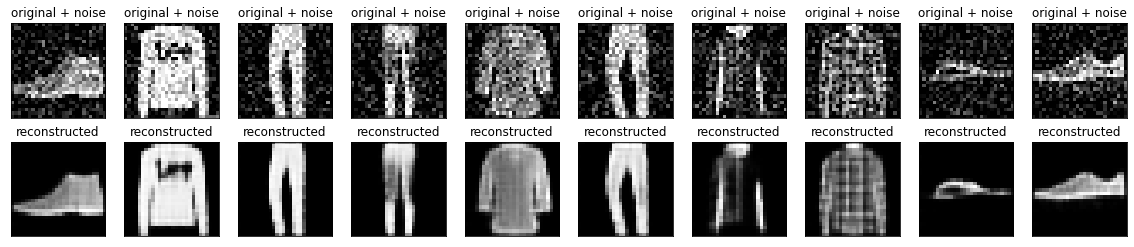

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

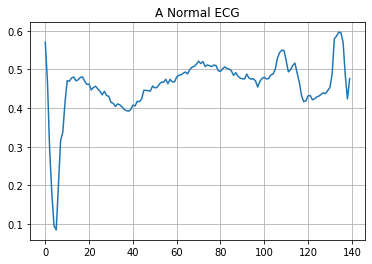

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

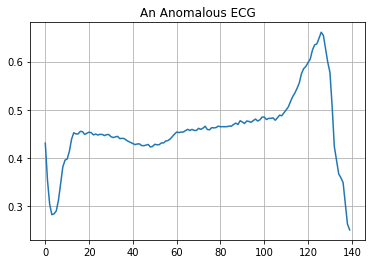

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0613

5/5 [==============================] - 0s 47ms/step - loss: 0.0589 - val_loss: 0.0535


Epoch 2/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0569

5/5 [==============================] - 0s 5ms/step - loss: 0.0561 - val_loss: 0.0519


Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0547

5/5 [==============================] - 0s 5ms/step - loss: 0.0536 - val_loss: 0.0502


Epoch 4/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0516

5/5 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.0483


Epoch 5/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0474

5/5 [==============================] - 0s 5ms/step - loss: 0.0457 - val_loss: 0.0465


Epoch 6/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0433

5/5 [==============================] - 0s 6ms/step - loss: 0.0417 - val_loss: 0.0437


Epoch 7/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0388

5/5 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.0418


Epoch 8/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0360

5/5 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.0403


Epoch 9/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0323

5/5 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0386


Epoch 10/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0297

5/5 [==============================] - 0s 5ms/step - loss: 0.0288 - val_loss: 0.0377


Epoch 11/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0274

5/5 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.0367


Epoch 12/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0256

5/5 [==============================] - 0s 5ms/step - loss: 0.0257 - val_loss: 0.0363


Epoch 13/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0251

5/5 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0356


Epoch 14/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0251

5/5 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0355


Epoch 15/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0235

5/5 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.0350


Epoch 16/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0231

5/5 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0348


Epoch 17/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0235

5/5 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.0344


Epoch 18/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0217

5/5 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.0343


Epoch 19/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0220

5/5 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.0340


Epoch 20/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0217

5/5 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.0338


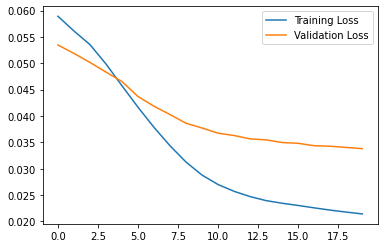

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

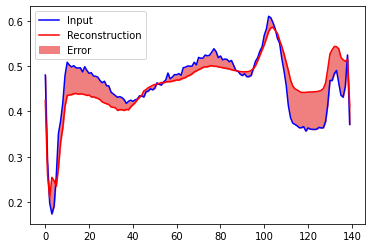

In [30]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

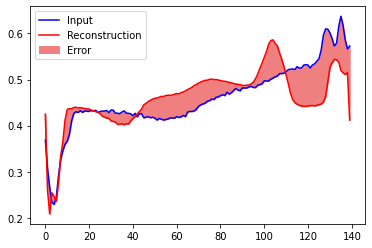

In [31]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

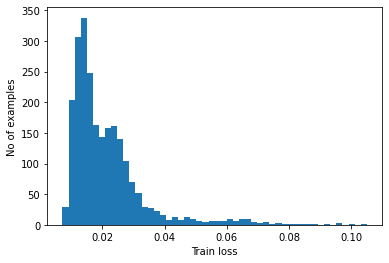

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033656895


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the recontruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

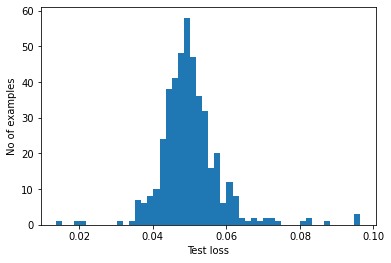

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429


## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
